In [2]:
## Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from sklearn.model_selection import train_test_split
import sys
import os
sys.path.append(os.path.abspath("../.."))
from src.preprocessing.preprocessing_functions import *

# Loading Data and Reshaping
#### Note: everything is repeated for the 3 Bioreplicates (BR1, BR2, BR3)

In [2]:
# Load all track data
track_data_br1 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR1_tracks_0606224.csv') 
track_data_br2 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR2_tracks_0606224.csv') 
track_data_br3 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR3_tracks_060624.csv') 

filtered_track_br1, y_train_br1 = process_track_data(track_data_br1)
filtered_track_br2, y_train_br2 = process_track_data(track_data_br2)
filtered_track_br3, y_train_br3 = process_track_data(track_data_br3)

Filtered data shape (478, 1080, 19) (478,)
Filtered data shape (493, 1080, 19) (493,)
Filtered data shape (856, 1080, 19) (856,)


In [3]:
sub_size = (20, 20)

# BR1
images_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=False, FRET=False)
segmentations_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=True, FRET=False)
fret_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=True, FRET=True)

# BR2
images_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=False, FRET=False)
segmentations_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=True, FRET=False)
fret_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=True, FRET=True)

# BR3
images_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=False, FRET=False)
segmentations_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=True, FRET=False)
fret_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=True, FRET=True)

print("BR1 Images shape:", images_br1.shape, "BR2:", images_br2.shape, "BR3:", images_br3.shape)
print("BR1 tracks shape:", filtered_track_br1.shape, "BR2:", filtered_track_br2.shape, "BR3:", filtered_track_br3.shape)

[ 1  1  1 ... 20 20 20]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G001_0001.tif']
[21 21 21 ... 39 39 39]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G002_0001.tif']
[40 40 40 ... 59 59 59]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G003_0001.tif']
[ 60  60  60 ... 122 122 122]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G004_0001.tif']
[123 123 123 ... 161 161 161]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G005_0001.tif']
[162 162 162 ... 203 203 203]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G006_0001.tif']
[204 204 204 ... 296 296 296]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B05_G007_0001.tif']
[297 297 297 ... 375 375 375]
bioreplicate: B

In [4]:
np.save("images_br1.npy", images_br1)
np.save("segmentations_br1.npy", segmentations_br1)
np.save("fret_br1.npy", fret_br1)
np.save("images_br2.npy", images_br2)
np.save("segmentations_br2.npy", segmentations_br2)
np.save("fret_br2.npy", fret_br2)
np.save("images_br3.npy", images_br3)
np.save("segmentations_br3.npy", segmentations_br3)
np.save("fret_br3.npy", fret_br3)
np.save("y_train_br1.npy", y_train_br1)
np.save("y_train_br2.npy", y_train_br2)
np.save("y_train_br3.npy", y_train_br3)

# PreProcessing
#### From this point on, cells on the raw images, segmentation, fret and tracks will be processed equally (Outlier remover).

In [3]:
images_br1 = np.load("images_br1.npy")
segmentations_br1 = np.load("segmentations_br1.npy")
fret_br1 = np.load("fret_br1.npy")
images_br2 = np.load("images_br2.npy")
segmentations_br2 = np.load("segmentations_br2.npy")
fret_br2 = np.load("fret_br2.npy")
images_br3 = np.load("images_br3.npy")
segmentations_br3 = np.load("segmentations_br3.npy")
fret_br3 = np.load("fret_br3.npy")
y_train_br1_ = np.load("y_train_br1.npy")
y_train_br2_ = np.load("y_train_br2.npy")
y_train_br3_ = np.load("y_train_br3.npy")


## 1. Removing cells from edges of FOV

In [4]:
#### Removing cells in edges of the FOV ####

indexes_to_remove_br1 = edge_indexes(images_br1)

images_br1_no_edges = np.delete(images_br1, indexes_to_remove_br1, axis=0)
y_train_br1_no_edges = np.delete(y_train_br1_, indexes_to_remove_br1)
segmentations_br1_no_edges = np.delete(segmentations_br1, indexes_to_remove_br1, axis=0)
filtered_track_br1_no_edges = np.delete(filtered_track_br1, indexes_to_remove_br1, axis=0)

print("New dataset shape:", images_br1_no_edges.shape, "Segmentations shape:", segmentations_br1_no_edges.shape, "tracks:", filtered_track_br1_no_edges.shape, "y train:", y_train_br1_no_edges.shape)


New dataset shape: (452, 1080, 3, 20, 20) Segmentations shape: (452, 1080, 20, 20) tracks: (452, 1080, 19) y train: (452,)


In [5]:

indexes_to_remove_br2 = edge_indexes(images_br2)

images_br2_no_edges = np.delete(images_br2, indexes_to_remove_br2, axis=0)
y_train_br2_no_edges = np.delete(y_train_br2_, indexes_to_remove_br2)
segmentations_br2_no_edges = np.delete(segmentations_br2, indexes_to_remove_br2, axis=0)
filtered_track_br2_no_edges = np.delete(filtered_track_br2, indexes_to_remove_br2, axis=0)

print("New dataset shape:", images_br2_no_edges.shape, "Segmentations shape:", segmentations_br2_no_edges.shape, "tracks:", filtered_track_br2_no_edges.shape, "y train:", y_train_br2_no_edges.shape)


New dataset shape: (473, 1080, 3, 20, 20) Segmentations shape: (473, 1080, 20, 20) tracks: (473, 1080, 19) y train: (473,)


In [6]:
indexes_to_remove_br3 = edge_indexes(images_br3)

images_br3_no_edges = np.delete(images_br3, indexes_to_remove_br3, axis=0)
y_train_br3_no_edges = np.delete(y_train_br3_, indexes_to_remove_br3)
segmentations_br3_no_edges = np.delete(segmentations_br3, indexes_to_remove_br3, axis=0)
filtered_track_br3_no_edges = np.delete(filtered_track_br3, indexes_to_remove_br3, axis=0)

print("New dataset shape:", images_br3_no_edges.shape, "Segmentations shape:", segmentations_br3_no_edges.shape, "tracks:", filtered_track_br3_no_edges.shape, "y train:", y_train_br3_no_edges.shape)

New dataset shape: (804, 1080, 4, 20, 20) Segmentations shape: (804, 1080, 20, 20) tracks: (804, 1080, 19) y train: (804,)


In [ ]:
np.save("images_br1_no_edges.npy", images_br1_no_edges)
np.save("segmentations_br1_no_edges.npy", segmentations_br1_no_edges)
np.save("y_train_br1_no_edges.npy", y_train_br1_no_edges)
np.save("filtered_track_br1_no_edges.npy", filtered_track_br1_no_edges)
np.save("images_br2_no_edges.npy", images_br2_no_edges)
np.save("segmentations_br2_no_edges.npy", segmentations_br2_no_edges)
np.save("y_train_br2_no_edges.npy", y_train_br2_no_edges)
np.save("filtered_track_br2_no_edges.npy", filtered_track_br2_no_edges)
np.save("images_br3_no_edges.npy", images_br3_no_edges)

In [8]:
np.save("segmentations_br3_no_edges.npy", segmentations_br3_no_edges)
np.save("y_train_br3_no_edges.npy", y_train_br3_no_edges)
np.save("filtered_track_br3_no_edges.npy", filtered_track_br3_no_edges)


## 2. Overimpose images with segmentations to remove background noise

In [9]:
overimposed_br1 = overimpose(images_br1_no_edges, segmentations_br1_no_edges)

In [7]:
overimposed_br2 = overimpose(images_br2_no_edges, segmentations_br2_no_edges)

In [8]:
overimposed_br3 = overimpose(images_br3_no_edges, segmentations_br3_no_edges)

## 3. Removal of daughter cells (data points without tpos 1, 2 or 3)

In [9]:
##### Removing daughter cells ####
# We can remove the daughter cells by removing the data points that do not have the time points 1,2 or 3 (which means they started their "lifetimes" somewhere in the middle of the time series, meaning they could only be daughter cells)

indexes_daughter_br1 = daughter_indexes(filtered_track_br1_no_edges)
print("Indices of cells without time points 1, 2, and 3 in `tpos`:", indexes_daughter_br1)
br1_mother_tracks = np.delete(filtered_track_br1_no_edges, indexes_daughter_br1, axis=0)
br1_mother_images = np.delete(overimposed_br1, indexes_daughter_br1, axis=0)
br1_y_train = np.delete(y_train_br1_no_edges, indexes_daughter_br1, axis=0)


Indices of cells without time points 1, 2, and 3 in `tpos`: [10, 15, 18, 36, 78, 81, 85, 96, 99, 105, 110, 111, 139, 148, 152, 153, 156, 157, 170, 179, 182, 185, 186, 187, 190, 191, 195, 198, 203, 220, 222, 228, 232, 241, 245, 247, 270, 285, 292, 302, 304, 306, 326, 329, 359, 371, 378, 391, 398, 406, 409, 412, 418, 436, 443, 445, 446]


In [10]:
indexes_daughter_br2 = daughter_indexes(filtered_track_br2_no_edges)
print("Indices of cells without time points 1, 2, and 3 in `tpos`:", indexes_daughter_br2)
br2_mother_tracks = np.delete(filtered_track_br2_no_edges, indexes_daughter_br2, axis=0)
br2_mother_images = np.delete(overimposed_br2, indexes_daughter_br2, axis=0)
br2_y_train = np.delete(y_train_br2_no_edges, indexes_daughter_br2, axis=0)

Indices of cells without time points 1, 2, and 3 in `tpos`: [3, 5, 11, 28, 30, 33, 36, 46, 65, 72, 74, 76, 80, 82, 83, 88, 89, 92, 94, 105, 108, 109, 110, 119, 135, 140, 152, 156, 162, 182, 189, 194, 209, 232, 233, 263, 265, 273, 274, 275, 281, 283, 299, 304, 305, 307, 318, 325, 329, 333, 342, 369, 374, 395, 397, 402, 427, 429, 432, 439, 443, 458, 465]


In [11]:
indexes_daughter_br3 = daughter_indexes(filtered_track_br3_no_edges)
print("Indices of cells without time points 1, 2, and 3 in `tpos`:", indexes_daughter_br3)
br3_mother_tracks = np.delete(filtered_track_br3_no_edges, indexes_daughter_br3, axis=0)
br3_mother_images = np.delete(overimposed_br3, indexes_daughter_br3, axis=0)
br3_y_train = np.delete(y_train_br3_no_edges, indexes_daughter_br3, axis=0)

print(br1_mother_images.shape, br2_mother_images.shape, br3_mother_images.shape)

Indices of cells without time points 1, 2, and 3 in `tpos`: [40, 63, 71, 77, 107, 116, 118, 155, 158, 162, 172, 174, 178, 180, 183, 188, 191, 195, 199, 204, 206, 212, 214, 225, 237, 239, 243, 246, 256, 262, 266, 277, 279, 287, 290, 307, 308, 309, 336, 346, 361, 368, 387, 389, 403, 409, 425, 426, 438, 456, 460, 463, 479, 498, 500, 513, 527, 536, 553, 554, 557, 571, 574, 580, 631, 637, 641, 667, 680, 695, 697, 701, 707, 712, 713, 718, 725, 737, 747, 750, 752, 773, 779, 782, 791, 794, 799]
(395, 1080, 2, 20, 20) (410, 1080, 2, 20, 20) (717, 1080, 2, 20, 20)


In [12]:
### save from here!!! ###
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/br1_mother_images.npy", br1_mother_images)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/br2_mother_images.npy", br2_mother_images)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/br3_mother_images.npy", br3_mother_images)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/br1_mother_tracks.npy", br1_mother_tracks)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/br2_mother_tracks.npy", br2_mother_tracks)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/br3_mother_tracks.npy", br3_mother_tracks)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/br1_y_train.npy", br1_y_train)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/br2_y_train.npy", br2_y_train)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/br3_y_train.npy", br3_y_train)

## 4. Remove daughter trace from the same track as mother 

(This is done in the cases where trackmate associated the same ID to the mother and correspondent daughter, we still need to remove the daughter from the mother track)

In [3]:
br1_mother_images = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/images/br1_mother_images.npy")
br2_mother_images = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/images/br2_mother_images.npy")
br3_mother_images = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/images/br3_mother_images.npy")
br1_mother_tracks = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/br1_mother_tracks.npy")
br2_mother_tracks = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/br2_mother_tracks.npy")
br3_mother_tracks = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/br3_mother_tracks.npy")
br1_y_train = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/labels/br1_y_train.npy")
br2_y_train = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/labels/br2_y_train.npy")
br3_y_train = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/labels/br3_y_train.npy")

In [8]:
processed_br1_mother_tracks, processed_br1_images = daughter_trace_removal(br1_mother_tracks, br1_mother_images)
processed_br2_mother_tracks, processed_br2_images = daughter_trace_removal(br2_mother_tracks, br2_mother_images)
processed_br3_mother_tracks, processed_br3_images = daughter_trace_removal(br3_mother_tracks, br3_mother_images)

## 5. Concatenate all bioreplicates
We also split y_train into 2 fates: non-mitosis and mitosis

In [11]:
images = np.concatenate((processed_br1_images, processed_br2_images, processed_br3_images), axis=0)
tracks = np.concatenate((processed_br1_mother_tracks, processed_br2_mother_tracks, processed_br3_mother_tracks), axis=0)
y_train_final = np.concatenate((br1_y_train, br2_y_train, br3_y_train), axis=0)

In [13]:
assert images.shape[0] == tracks.shape[0] == y_train_final.shape[0]
print("Number of cells:", images.shape[0])

Number of cells: 1522


In [14]:
# Split y_train into the 2 fates (non mitosis and mitosis)

print("y_train from first generation only", y_train_final.shape, "Nb of fates originally:", np.unique(y_train_final))

y_train = np.zeros_like(y_train_final)

# Combine fates 0 and 1 into fate 0
y_train[np.isin(y_train_final, [0, 1])] = 0

# Combine fates 2 and 3 into fate 1
y_train[np.isin(y_train_final, [2, 3])] = 1

print(np.unique(y_train))
# Check total nb of fates
num_fate_0= np.sum(y_train == 0)
num_fate_1= np.sum(y_train == 1)
num_fate_2= np.sum(y_train == 2)

print(f"Number of fate 0: {num_fate_0}")
print(f"Number of fate 1: {num_fate_1}")
print(f"Number of fate 2: {num_fate_2}")

y_train from first generation only (1522,) Nb of fates originally: [0 1 2 3]
[0 1]
Number of fate 0: 1264
Number of fate 1: 258
Number of fate 2: 0


## 6. Manual removal of "problematic, clutered" cells 
This means removing cells with more than one neighbouring cell ("touching each other" in the same FOV)

In [15]:
cell_indexes_to_remove = [
    64, 131, 193, 194, 271, 274, 279, 299, 395, 400, 499, 521, 541, 603, 629, 
    683, 685, 692, 733, 740, 769, 804, 810, 1034, 1039, 1061, 1186, 1203, 1206, 
    1319, 1335, 1340, 1389, 1395, 1419, 1519
]
problematic_fov = [index for index in range(931, 1032)] # FOV WITH PROBLEMATIC INDEXES
cell_indexes_to_remove.extend(problematic_fov)

cell_indexes_to_remove = sorted(set(cell_indexes_to_remove))

In [16]:
filtered_images = np.delete(images, cell_indexes_to_remove, axis=0)
filtered_tracks = np.delete(tracks, cell_indexes_to_remove, axis=0)
filtered_y_train = np.delete(y_train, cell_indexes_to_remove, axis=0)
filtered_y_train_all_fates = np.delete(y_train_final, cell_indexes_to_remove, axis=0)

assert filtered_images.shape[0] == filtered_tracks.shape[0] == filtered_y_train.shape[0] == filtered_y_train_all_fates.shape[0]

## 7. Remove extra debris from cells
This is because sometimes smaller cells appear at the edge of the FOV, so we want to remove those from the FOV of each cell. (Keeping only the cell we want to process)

In [18]:
cleaned_images = clean_all_cells(filtered_images)

## 8. Get FRET ratio 
Divide the 2 fluorescence channels (here we divided CFP by YFP, so our images are 1/FRET)

In [ ]:
fret_images = cleaned_images[:,:,0,:,:] / cleaned_images[:,:,1,:,:] 
fret_images = np.nan_to_num(fret_images, nan=0.0)

In [ ]:
problematic_cells = find_problematic_cells_and_times(fret_images)
print("Problematic cells:", problematic_cells)

### 8.1 Removal of 1 problematic cell
It appears that 1 pixel value in a few cell images have a very high value in one channel in comparison to the other for some reason (experimentally-speaking) so when we calculate the fret ratio in the next step, the value is massive, which later on when I'm normalising my entire dataset, this one is set as maximum which is causing major issues down the line

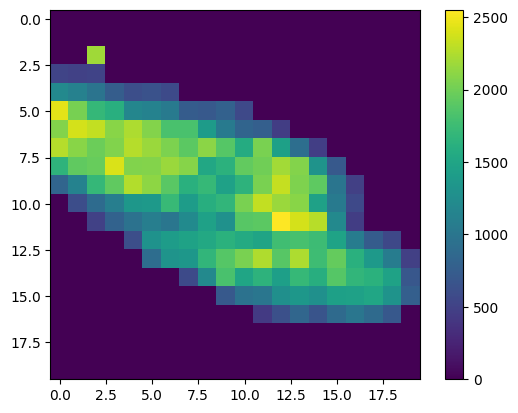

In [20]:
plt.imshow(cleaned_images[1336, 206, 1])
plt.colorbar()

In [22]:
# the cell index and time index are found in the next step (where the channels are divided)
new_cleaned_images = remove_and_replace(cleaned_images, cell_index=1336, time_index=206)
new_cleaned_images = remove_and_replace(new_cleaned_images, cell_index=82, time_index=786)
new_cleaned_images = remove_and_replace(new_cleaned_images, cell_index=517, time_index=255)
new_cleaned_images = remove_and_replace(new_cleaned_images, cell_index=619, time_index=22)
new_cleaned_images = remove_and_replace(new_cleaned_images, cell_index=1184, time_index=167)

In [24]:
filtered_tracks.shape, filtered_y_train.shape, new_cleaned_images.shape

((1385, 1080, 19), (1385,), (1385, 1080, 2, 20, 20))

In [ ]:
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/cleaned_images.npy", new_cleaned_images)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/filtered_tracks.npy", filtered_tracks)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/filtered_y_train.npy", filtered_y_train)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/filtered_y_train_all_fates.npy", filtered_y_train_all_fates)

### 8.2 Get FRET ratio 
Divide the 2 fluorescence channels (here we divided CFP by YFP, so our images are 1/FRET), with the new filtered images

In [80]:
fret_images = new_cleaned_images[:,:,0,:,:] / new_cleaned_images[:,:,1,:,:] 
fret_images = np.nan_to_num(fret_images, nan=0.0)

/var/folders/ds/_m8m03r135b5r67hc6xgtxt00000gn/T/ipykernel_87655/3325400739.py:1: RuntimeWarning: invalid value encountered in divide
  fret_images = new_cleaned_images[:,:,1,:,:] / new_cleaned_images[:,:,0,:,:]


## 9. Normalise images

In [88]:
norm_images = normalize_images_per_frame(fret_images)

## 10. Center all cells to the middle of FOV

In [91]:
centered_images = center_cells(norm_images)

In [ ]:
# ## save
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/norm_images.npy", centered_images)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/filtered_tracks.npy", filtered_tracks)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/filtered_y_train.npy", filtered_y_train)

# Preparing for Model Training
### Train-test split, data augmentation, etc

## 1. Train-test split

In [ ]:
train_indexes, test_indexes = train_test_split(
        np.arange(len(filtered_y_train)),
        test_size=0.2,
        stratify=filtered_y_train,
        random_state=42
    )
    
train_images = centered_images[train_indexes]
test_images = centered_images[test_indexes]

train_tracks = filtered_tracks[train_indexes]
test_tracks = filtered_tracks[test_indexes]

train_labels = filtered_y_train[train_indexes]
test_labels = filtered_y_train[test_indexes]


## 2. Data Augmentation

In [ ]:
train_images = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/images/train_images.npy")
test_images = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/images/test_images.npy")
train_labels = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/labels/train_labels.npy")
test_labels = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/labels/test_labels.npy")
train_tracks = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/train_tracks.npy")
test_tracks = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/test_tracks.npy")

In [26]:
train_images_augmented, train_labels_augmented = augment_dataset(train_images, train_labels, augmentations)

print(train_images_augmented.shape, train_labels_augmented.shape, train_tracks.shape, test_images.shape, test_labels.shape, test_tracks.shape)

((2184, 1080, 20, 20),
 (2184,),
 (1108, 1080, 19),
 (277, 1080, 20, 20),
 (277,),
 (277, 1080, 19))

In [14]:
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/train_images_augmented.npy", train_images_augmented)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/train_labels_augmented.npy", train_labels_augmented)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/train_labels.npy", train_labels)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/train_tracks.npy", train_tracks)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/test_tracks.npy", test_tracks)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/test_images.npy", test_images)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/test_labels.npy", test_labels)

## 3. Stretch image intensities in a frame-wise way
This is done to do a scaling of the intensities in each cell, so that the minimum value is 0 (but keeping the same "relationship" between pixel values)

In [ ]:
stretched_x_train, stretched_x_test = stretch_intensities_global(train_images_augmented, test_images)

In [46]:
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/stretched_x_train.npy", stretched_x_train)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/stretched_x_test.npy", stretched_x_test)

## 4. Cell Clock Normalisation

In [ ]:
time_norm_train_track = normalize_cell_time(train_tracks)
time_norm_test_track = normalize_cell_time(test_tracks)

time_norm_train_images = normalize_cell_time_images(stretched_x_train)
time_norm_test_images = normalize_cell_time_images(stretched_x_test)

In [ ]:
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/time_norm_train_images.npy", time_norm_train_images)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/time_norm_test_images.npy", time_norm_test_images)

# Random things

In [81]:
import numpy as np

# Assuming br3_mother_tracks and br3_y_train are already defined
fate_matrix = br3_mother_tracks[br3_mother_tracks[:,0,-1] == 3][:, :, -1]

# Find the first zero in each row
first_zero_indices = np.apply_along_axis(lambda row: np.argmax(row == 0) if np.any(row == 0) else -1, axis=1, arr=fate_matrix)

# Print the results
print("First zero indices for each row:")
print(first_zero_indices)


First zero indices for each row:
[ 532  464  322  189  379  577  554  601  969  426  546  840 1003  257
  878  518  713  467  579  606  522 1038 1070  180 1027  730  201  548
  344  606]


In [91]:
br1_mother_tracks[br1_y_train == 2].shape

(34, 1080, 10)

In [113]:
import numpy as np

def daugther_trace_removal(matrix):
    """
    For each cell (row) in the matrix, sets all values in all columns to zero 
    starting from the first zero in the 4th column (index 3).
    
    Args:
        matrix (numpy.ndarray): A 3D matrix of shape (cells, time, features).
        
    Returns:
        numpy.ndarray: Processed matrix with zeroed values from the first zero onward in the 4th column.
    """
    processed_matrix = matrix.copy()
    
    for cell_idx, cell in enumerate(processed_matrix):
        # Find the first zero in the 4th column
        first_zero_index = np.argmax(cell[:, 4] == 0) if np.any(cell[:, 4] == 0) else None
        
        # If a zero is found, set all values from that time point onward to zero
        if first_zero_index is not None:
            processed_matrix[cell_idx, first_zero_index:, :] = 0
    
    return processed_matrix

# Apply the function to the subset of the tracks
processed_br1_mother_tracks = daugther_trace_removal(br1_mother_tracks[br1_y_train == 2])

# Confirm the changes
print("Processed matrix shape:", processed_br1_mother_tracks.shape)


Processed matrix shape: (34, 1080, 10)


In [95]:
br1_mother_tracks[br1_y_train == 2][0,:,4][400:600]

array([1.0736096 , 1.055149  , 1.0905303 , 1.092127  , 1.0840935 ,
       1.0563608 , 1.0748883 , 1.0784637 , 1.0592111 , 1.046493  ,
       1.0360446 , 1.0512099 , 1.0363867 , 1.0667735 , 1.0261283 ,
       1.0341673 , 1.0197878 , 1.0158173 , 1.0193248 , 1.0104283 ,
       1.0097171 , 1.024575  , 1.0256407 , 1.0282562 , 1.0327061 ,
       1.0610956 , 1.0475533 , 1.0657954 , 1.0290425 , 1.0522226 ,
       1.0696201 , 1.0079278 , 1.0109152 , 1.0460668 , 1.0738034 ,
       1.038976  , 1.0237169 , 1.0068738 , 1.0322778 , 1.0143622 ,
       1.0208637 , 1.0555756 , 1.0425649 , 0.99591243, 1.0021855 ,
       1.0171853 , 1.0021807 , 1.0263573 , 0.9973811 , 0.9966945 ,
       1.0046283 , 1.0317597 , 1.0341554 , 1.0858612 , 1.072814  ,
       1.1046714 , 1.0886966 , 1.064392  , 1.0410048 , 1.0520434 ,
       1.0210351 , 0.98632115, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [121]:
daugther_trace_removal(br1_mother_tracks[br1_y_train == 2])[10]

array([[206.       , 191.62418  , 169.35526  , ...,   1.2271907,
        988.       ,   2.       ],
       [206.       , 192.09357  , 168.99722  , ...,   1.1654947,
        988.       ,   2.       ],
       [206.       , 191.67625  , 169.0062   , ...,   1.1755966,
        988.       ,   2.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]], dtype=float32)

In [7]:
tracks = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/filtered_tracks.npy")
labels = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/labels/filtered_y_train.npy")

In [24]:
division_tracks = tracks[labels == 1]

In [40]:
division_tracks[53][734]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

## Cell division times

In [8]:
def find_first_zero_indices(matrix):
    return np.apply_along_axis(lambda row: np.argmax(row == 0) if np.any(row == 0) else -1, axis=1, arr=matrix)

In [11]:
first_zero_tracks= find_first_zero_indices(tracks)
first_zero_tracks_division = find_first_zero_indices(tracks[labels==1])

In [17]:
np.where(first_zero_tracks_division==0)

(array([  9,  15,  19,  21,  29,  33,  33,  33,  33,  33,  33,  33,  33,
         33,  33,  33,  33,  33,  44,  45,  47,  53,  56,  59,  68,  78,
         84,  88, 111, 142, 200, 210, 211, 213, 218]),
 array([ 4,  4,  4,  4,  4,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4]))

In [19]:
first_zero_tracks_division.shape

(228, 19)

In [20]:
first_zero_tracks_division[15]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
def find_zero_time_indices(tracks):
    """
    Finds the first time index at which all 19 features become zero for each cell.
    
    Parameters:
        tracks (numpy array): Shape (300, 1080, 19), representing (cells, time points, features).
        
    Returns:
        numpy array: Shape (300,), containing the first time index where all features are zero for each cell.
                    If a cell never has all features as zero, returns -1 for that cell.
    """
    # Check where all features become zero along the time axis
    zero_mask = np.all(tracks == 0, axis=2)  # Shape: (300, 1080), True where all features are zero
    
    # Find the first time index where all features are zero for each cell
    zero_indices = np.argmax(zero_mask, axis=1)  # Get first occurrence along time axis
    
    # If a cell never reaches a fully zero state, set its value to -1
    zero_indices[~np.any(zero_mask, axis=1)] = -1  # If no zeros found, assign -1
    
    return zero_indices

In [43]:
find_zero_time_indices(tracks[labels == 1])

array([ 462,  499,  186,  862,  390,  190,  142,  635,  288,  718,  146,
        267,  500,  375,  312,    1,  160,  176,  225,    1,   89,    1,
        840,  912,  380,  586,  404,  371,  306,    1,  616,  473,  719,
        507,  157,  196,   29,  307,  473,  267,   68,  223,  252,  179,
          1,    1,  419,    1,  581,  485,  865,  215,  134,  732,  152,
        245,    1,   73,  145,    1,  314,  352,  127,  204,  137,  208,
        103,  975,    1,  250,  347,  416,  497,  566,  240,  685,  785,
        112,    1,  688,  297,   16,  219,  593,    1,   23,  257,   11,
          1,   42,  973,  425,  321,  307,  253,  787,  522,  363,  224,
        254,   34,   37,  326,  131,  579,  604,  637,  263,  391,  466,
        166,    1,  272,  445,  762,  485,  138,  951,  248,  461,  511,
        760,  140,  312,  306,   71,  581,  350,  380,  473,  650,  694,
        113,   84,  471,  519,  292,  555,  296,  935,  206,   71,    1,
         44,  979,  312,  426,  562,  115,  396,  3

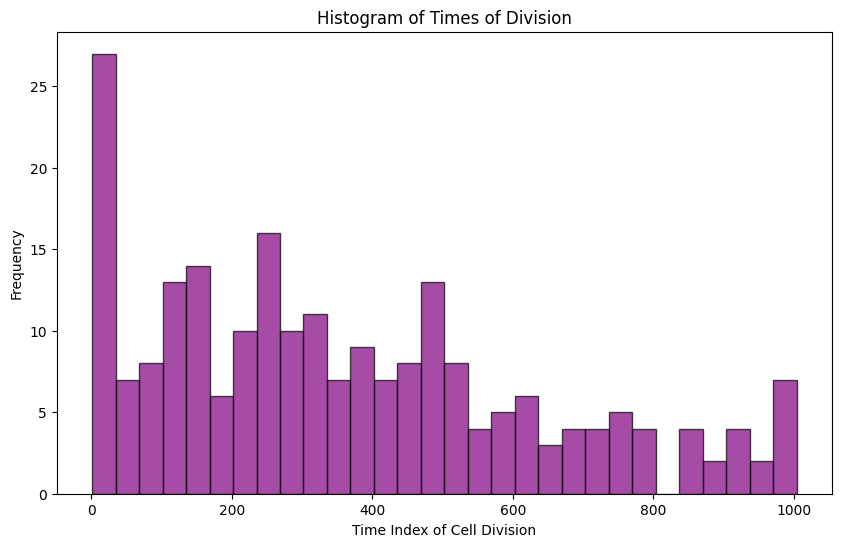

In [50]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(find_zero_time_indices(tracks[labels == 1]), bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.title('Histogram of Times of Division')
plt.xlabel('Time Index of Cell Division')
plt.ylabel('Frequency')
#plt.grid(axis='y', alpha=0.75)
plt.show()

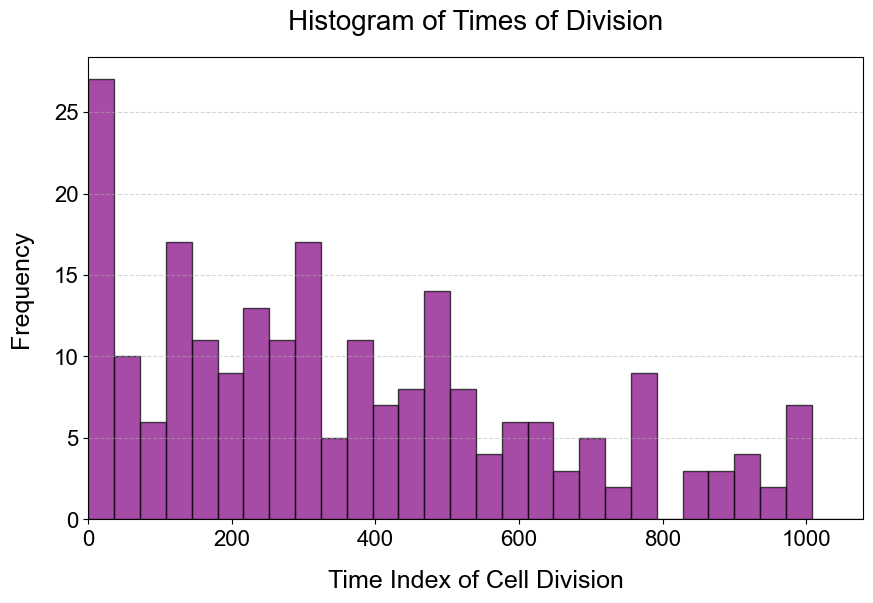

In [57]:
# Compute zero indices
zero_indices = find_zero_time_indices(tracks[labels == 1])

# Define bins and ensure 1080 is included
bins = np.linspace(0, 1080, 31)  # 30 bins + 1080 included

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(zero_indices, bins=bins, color='purple', alpha=0.7, edgecolor='black')

# Set title and labels with large Arial font
plt.title('Histogram of Times of Division', fontsize=20, fontname='Arial', pad=20)
plt.xlabel('Time Index of Cell Division', fontsize=18, fontname='Arial', labelpad=15)
plt.ylabel('Frequency', fontsize=18, fontname='Arial', labelpad=15)

# Tick labels with larger font
plt.xticks(fontsize=16, fontname='Arial')
plt.yticks(fontsize=16, fontname='Arial')

# Ensure x-axis goes up to 1080
plt.xlim(0, 1080)

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig("division_times.pdf", dpi=300, bbox_inches="tight")
plt.show()


First zero in the track means it split. 

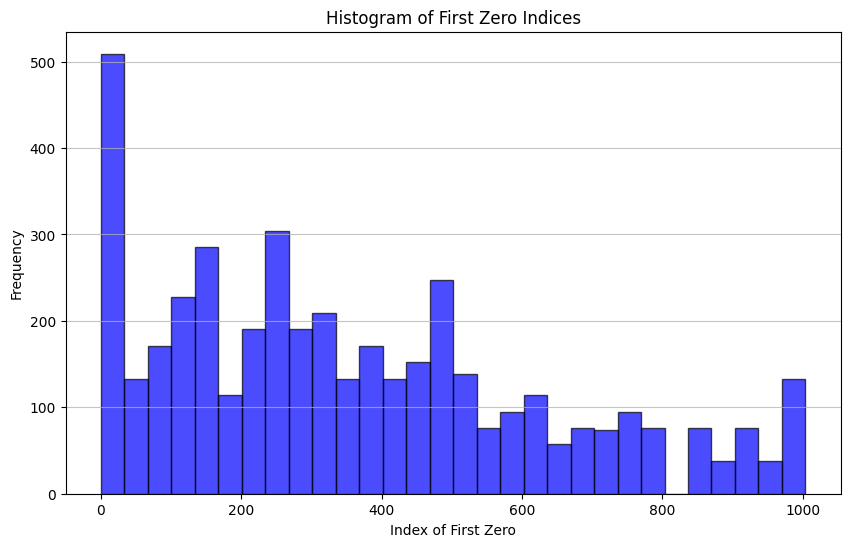

In [13]:
valid_indices = first_zero_tracks_division[first_zero_tracks_division != -1]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(valid_indices, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of First Zero Indices')
plt.xlabel('Index of First Zero')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

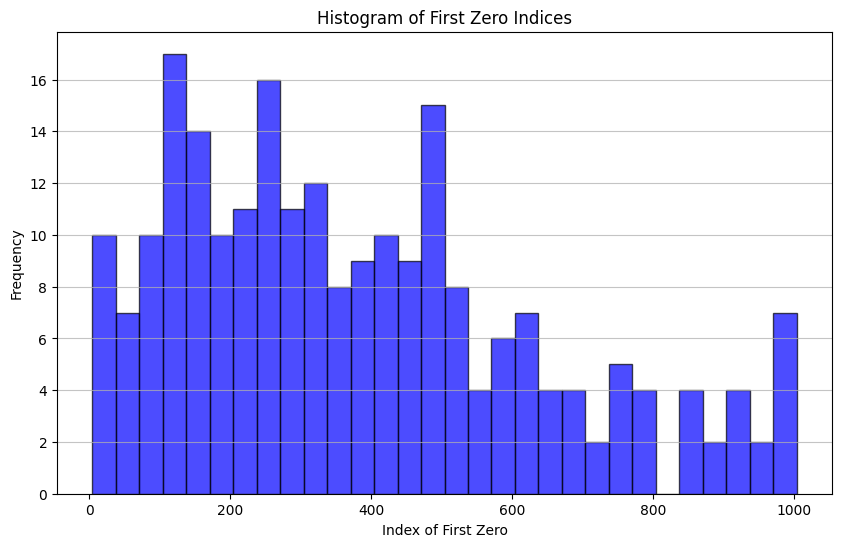

In [128]:
# Extract the matrices
matrix_br1_2 = daugther_trace_removal(br1_mother_tracks[br1_y_train == 2])[:, :, -1]
matrix_br1_3 = daugther_trace_removal(br1_mother_tracks[br1_y_train == 3])[:, :, -1]
matrix_br2_2 = daugther_trace_removal(br2_mother_tracks[br2_y_train == 2])[:, :, -1]
matrix_br2_3 = daugther_trace_removal(br2_mother_tracks[br2_y_train == 3])[:, :, -1]
matrix_br3_2 = daugther_trace_removal(br3_mother_tracks[br3_y_train == 2])[:, :, -1]
matrix_br3_3 = daugther_trace_removal(br3_mother_tracks[br3_y_train == 3])[:, :, -1]

# Function to find the first zero indices in each row
def find_first_zero_indices(matrix):
    return np.apply_along_axis(lambda row: np.argmax(row == 0) if np.any(row == 0) else -1, axis=1, arr=matrix)

# Find first zero indices for both matrices
first_zero_indices_br1_2 = find_first_zero_indices(matrix_br1_2)
first_zero_indices_br1_3 = find_first_zero_indices(matrix_br1_3)
first_zero_indices_br2_2 = find_first_zero_indices(matrix_br2_2)
first_zero_indices_br2_3 = find_first_zero_indices(matrix_br2_3)
first_zero_indices_br3_2 = find_first_zero_indices(matrix_br3_2)
first_zero_indices_br3_3 = find_first_zero_indices(matrix_br3_3)

# Combine the indices from both groups
combined_first_zero_indices = np.concatenate([first_zero_indices_br1_2, first_zero_indices_br1_3, first_zero_indices_br2_2, first_zero_indices_br2_3, first_zero_indices_br3_2, first_zero_indices_br3_3])

# Filter out the values where fret is always NaN (TODO: CHECK LATER WHICH ONES THEY ARE)
filtered_indices = combined_first_zero_indices[combined_first_zero_indices != 0]

# Filter out -1 values (rows with no zeros)
valid_indices = filtered_indices[filtered_indices != -1]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(valid_indices, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of First Zero Indices')
plt.xlabel('Index of First Zero')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
combined_first_zero_indices[np.any(combined_first_zero_indices[:, 0] != 0, axis=1)]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [126]:
combined_first_zero_indices

array([ 462,  190,  635,  288,    0,  500,  312,  160,  225,    0,  912,
        380,  404,  371,    0,  616,  473,  719,    0,  157,  196,   29,
        473,  267,  223,  179,    0,    0,  419,  581,  485,  215,  152,
        245,  499,  186,  862,  390,  142,  146,  267,  375,    0,  176,
         89,    0,  840,  586,  306,  307,   68,  252,    0,  865,  134,
          0,    0,   73,  145,    0,  314,  127,  204,  208,  103,    0,
        250,  416,  497,  566,  685,  785,  112,    0,  688,   16,  219,
        593,  257,   11,   42,  973,  321,  307,  787,  522,  363,  254,
         34,   37,  326,  131,  579,  263,  391,  166,    0,  272,  762,
        951,  248,  511,  760,  312,  350,  380,  694,   84,  471,  292,
        555,  296,  935,  206,   71,    0,  352,  137,  975,  347,  240,
        297,    0,   23,    0,  425,  253,  224,  604,  637,  466,  445,
        485,  138,  461,  140,  306,   71,  581,  473,  650,  113,  519,
         44,  979,  312,  426,  562,  396,  906, 10

In [80]:
br3_mother_tracks[br3_mother_tracks[:,0,-1] == 2][-21]

array([[1.6460000e+03, 1.8505713e+02, 2.2397194e+02, ..., 1.2351209e+00,
        8.3900000e+02, 2.0000000e+00],
       [1.6460000e+03, 1.8481119e+02, 2.2382285e+02, ..., 1.2118138e+00,
        8.3900000e+02, 2.0000000e+00],
       [1.6460000e+03, 1.8491660e+02, 2.2385893e+02, ..., 1.1923810e+00,
        8.3900000e+02, 2.0000000e+00],
       ...,
       [1.6460000e+03, 1.7720670e+02, 2.3622452e+02, ..., 1.5645307e+00,
        8.3900000e+02, 2.0000000e+00],
       [1.6460000e+03, 1.7727531e+02, 2.3627551e+02, ..., 1.5824816e+00,
        8.3900000e+02, 2.0000000e+00],
       [1.6460000e+03, 1.7739049e+02, 2.3631149e+02, ..., 1.5859095e+00,
        8.3900000e+02, 2.0000000e+00]], dtype=float32)

In [ ]:
np.nonzero(br3_mother_tracks[br3_y_train==2][:,:,-1])

(array([ 0,  0,  0, ..., 83, 83, 83]),
 array([   0,    1,    2, ..., 1064, 1065, 1066]))

## Centering cells better

In [4]:
import numpy as np

x_train = np.load('/Users/inescunha/Documents/GitHub/CellFate/data/stretched_x_train.npy')
#y_train = np.load('../data/train_labels.npy')
x_test = np.load('/Users/inescunha/Documents/GitHub/CellFate/data/stretched_x_test.npy')
#y_test = np.load('../data/test_labels.npy')

In [5]:
def center_cells(images):
    """
    Centers each cell in the middle of a 20x20 field-of-view.
    
    Args:
        images: NumPy array of shape (num_cells, 20, 20), where each cell is a binary or intensity image.

    Returns:
        Centered images of the same shape (num_cells, 20, 20).
    """
    num_cells, height, width = images.shape
    centered_images = np.zeros_like(images)

    for i in range(num_cells):
        img = images[i]

        # Find nonzero pixel indices
        y_indices, x_indices = np.where(img > 0)
        if len(y_indices) == 0 or len(x_indices) == 0:
            continue  # Skip empty images
        
        # Get bounding box
        y_min, y_max = y_indices.min(), y_indices.max()
        x_min, x_max = x_indices.min(), x_indices.max()
        
        # Extract the cell
        cropped_cell = img[y_min:y_max+1, x_min:x_max+1]

        # Compute new position to center the cropped cell
        new_y_start = (height - cropped_cell.shape[0]) // 2
        new_x_start = (width - cropped_cell.shape[1]) // 2
        
        # Place cropped cell into the new centered array
        centered_images[i, new_y_start:new_y_start+cropped_cell.shape[0], 
                            new_x_start:new_x_start+cropped_cell.shape[1]] = cropped_cell

    return centered_images


In [6]:
centered_x_train = center_cells(x_train)

In [16]:
centered_x_test = center_cells(x_test)

In [20]:
np.save("/Users/inescunha/Documents/GitHub/CellFate/data/centered_x_train.npy", centered_x_train)
np.save("/Users/inescunha/Documents/GitHub/CellFate/data/centered_x_test.npy", centered_x_test)

In [7]:
centered_x_train.shape

(2184, 20, 20)

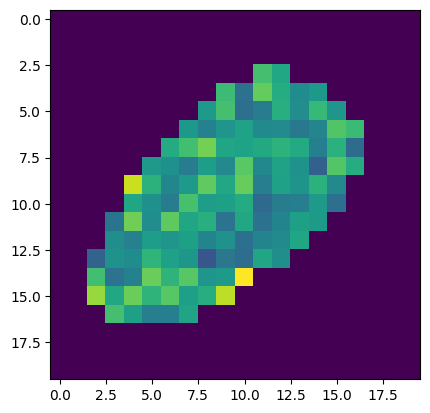

In [19]:
plt.imshow(centered_x_test[10])

In [ ]:
# to add: balance test set for visualisation